## Data in Motion: Data Analysis Challenge Week 3. Adult Income Analysis

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing dataset

In [2]:
income_data = pd.read_csv("adult.csv")

In [3]:
income_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
# checking columns
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
# checking for duplicate values
income_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [6]:
# are there missing values in the data?
income_data.isna()

income_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

##### Summary Statistics

In [7]:
income_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Demographic Analysis
##### What are the demographic characteristics (age, education, marital status, race, sex) of individuals earning more than 50000 annually compared to those earning less?
##### How do these characteristics vary between the two income groups?

In [8]:
# demographic characteristics of age
age = income_data['age'].describe()

# demographic characteristics of sex
sex = income_data.groupby('sex').size().reset_index(name = 'count')

# demographic characteristics of education
education = income_data.groupby('education').size().sort_values(ascending = False).reset_index(name = 'count')

# demographic characteristics of marital status
marital_status = income_data.groupby('marital.status').size().sort_values(ascending = False).reset_index(name = 'count')

# demographic characteristics of race
race = income_data.groupby('race').size().sort_values(ascending = False).reset_index(name = 'count')

age,sex,education,marital_status,race

(count    32561.000000
 mean        38.581647
 std         13.640433
 min         17.000000
 25%         28.000000
 50%         37.000000
 75%         48.000000
 max         90.000000
 Name: age, dtype: float64,
       sex  count
 0  Female  10771
 1    Male  21790,
        education  count
 0        HS-grad  10501
 1   Some-college   7291
 2      Bachelors   5355
 3        Masters   1723
 4      Assoc-voc   1382
 5           11th   1175
 6     Assoc-acdm   1067
 7           10th    933
 8        7th-8th    646
 9    Prof-school    576
 10           9th    514
 11          12th    433
 12     Doctorate    413
 13       5th-6th    333
 14       1st-4th    168
 15     Preschool     51,
           marital.status  count
 0     Married-civ-spouse  14976
 1          Never-married  10683
 2               Divorced   4443
 3              Separated   1025
 4                Widowed    993
 5  Married-spouse-absent    418
 6      Married-AF-spouse     23,
                  race  count
 0          

In [9]:
# How do these characters vary between two income groups?
#sex
sex_income = income_data.groupby('sex')['income'].value_counts().reset_index()

# education
education_income = income_data.groupby('education')['income'].value_counts().reset_index(name = 'count')

# marrital status
marriage_income = income_data.groupby('marital.status')['income'].value_counts().reset_index(name = 'count')

# race
race_income = income_data.groupby('race')['income'].value_counts().reset_index(name = 'count')

race_income

,race,income,count
0,Amer-Indian-Eskimo,<=50K,275
1,Amer-Indian-Eskimo,>50K,36
2,Asian-Pac-Islander,<=50K,763
3,Asian-Pac-Islander,>50K,276
4,Black,<=50K,2737
5,Black,>50K,387
6,Other,<=50K,246
7,Other,>50K,25
8,White,<=50K,20699
9,White,>50K,7117


#### Work Class and Occupation
##### How do different work classes (e.g., Private, Self-Employed, Government) and occupations (e.g., Exec-managerial, Machine-op-inspct) impact the likelihood of earning more than 50,000?
##### Are there specific work classes or occupations that are more likely to earn higher incomes

In [16]:
# remove missing values in the workclass and occupation column
cleaned_data = income_data[(income_data['workclass'] != '?') & (income_data['occupation'] != '?')].copy()

# creating a binary column for high income
cleaned_data.loc[:,'high_income'] = cleaned_data['income'] == '>50K'

# groupby workclass and calculate mean of the high income variable
workclass = cleaned_data.groupby('workclass')['high_income'].mean().reset_index()

# groupby occupation and calculate mean of the high income variable
occupation = cleaned_data.groupby('occupation')['high_income'].mean().reset_index()

workclass_sorted = workclass.sort_values(by = 'high_income', ascending = False)
occupation_sorted = occupation.sort_values(by = 'high_income', ascending = False)

workclass_sorted,occupation_sorted

(          workclass  high_income
 3      Self-emp-inc     0.557348
 0       Federal-gov     0.386458
 1         Local-gov     0.294792
 4  Self-emp-not-inc     0.284927
 5         State-gov     0.271957
 2           Private     0.218673
 6       Without-pay     0.000000,
            occupation  high_income
 3     Exec-managerial     0.484014
 9      Prof-specialty     0.449034
 10    Protective-serv     0.325116
 12       Tech-support     0.304957
 11              Sales     0.269315
 2        Craft-repair     0.226641
 13   Transport-moving     0.200376
 0        Adm-clerical     0.134483
 6   Machine-op-inspct     0.124875
 4     Farming-fishing     0.115694
 1        Armed-Forces     0.111111
 5   Handlers-cleaners     0.062774
 7       Other-service     0.041578
 8     Priv-house-serv     0.006711)

#### Education and Work Hours:

##### How does the level of education and the number of hours worked per week correlate with income levels?
##### Is there a significant difference in the education levels and working hours between high-income and low-income earners?

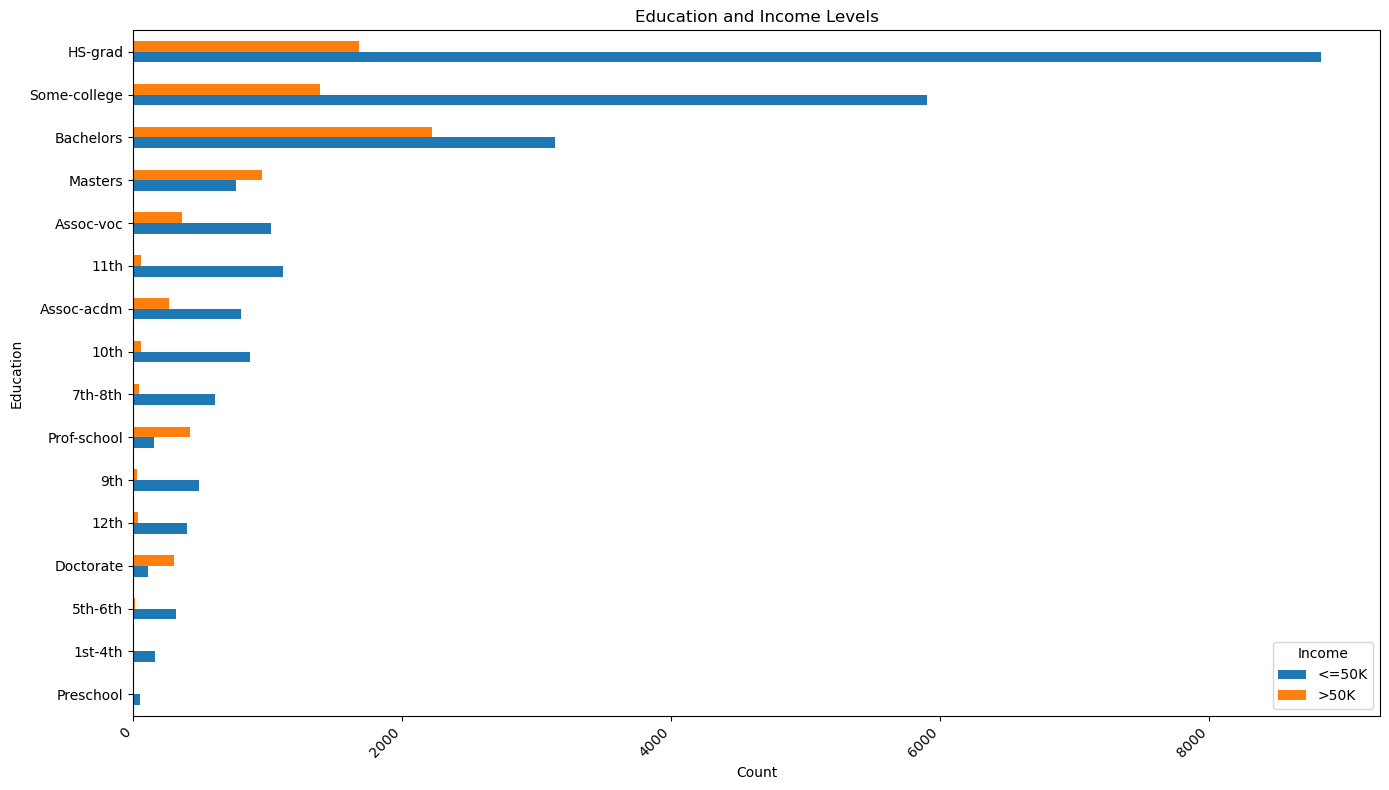

In [11]:
# Education vs Income levels

# a pivot table for count of eduaction and income levels
pivot_table = income_data.pivot_table(index='education', columns='income', aggfunc='size', fill_value=0)

# Calculate the total counts for sorting
pivot_table['total'] = pivot_table.sum(axis=1)

# Sort the pivot table by total counts in descending order
pivot_table_sorted = pivot_table.sort_values(by='total', ascending= True)

# Drop the 'total' column before plotting
pivot_table_sorted = pivot_table_sorted.drop(columns='total')

# Plot the grouped bar chart
pivot_table_sorted.plot(kind='barh', figsize=(14, 8))
plt.title('Education and Income Levels')
plt.ylabel('Education')
plt.xlabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

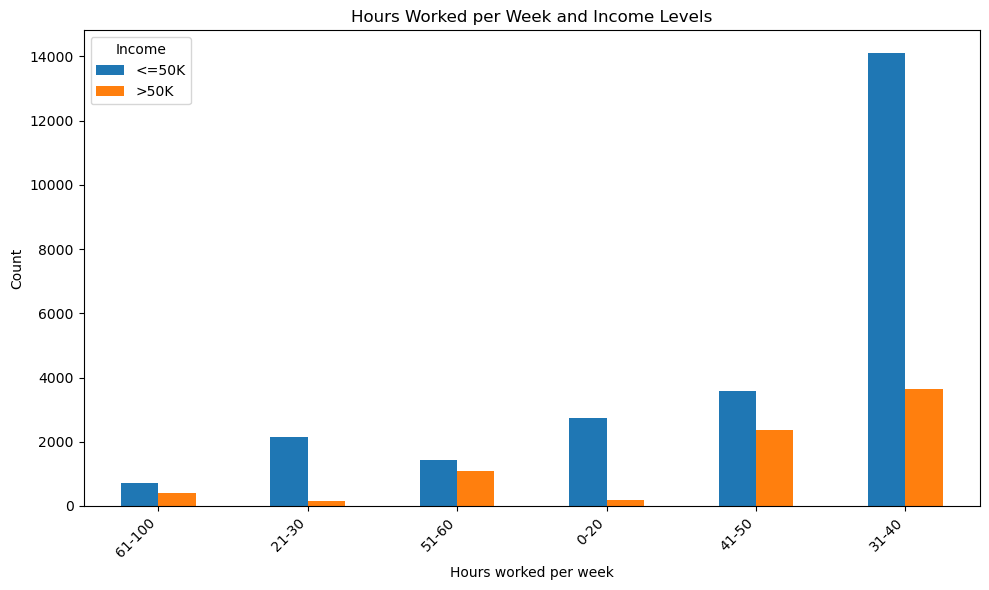

In [12]:
# number of hours worked per week v income levels

# create bins for hours worked per week
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-100']

# create a new bins columns
income_data['hours_per_week_bins'] = pd.cut(income_data['hours.per.week'], bins=bins, labels=labels)

# a pivot column for binned hours worked per week and income levels
pivot_table = income_data.pivot_table(index='hours_per_week_bins', columns='income', aggfunc='size', fill_value=0)

# Calculate the total counts for sorting
pivot_table['total'] = pivot_table.sum(axis=1)

# Sort the pivot table by total counts in ascendingd order
pivot_table_sorted = pivot_table.sort_values(by='total', ascending= True)

# Drop the 'total' column before plotting
pivot_table_sorted = pivot_table_sorted.drop(columns='total')

# Plot the grouped bar chart
pivot_table_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Hours Worked per Week and Income Levels')
plt.xlabel('Hours worked per week')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
plt.show()
